## Quality control and mapping

For this part, I will perform a quality control check and map the reads to the GRCh38 reference human genome using STAR

In [1]:
#First, we make sure we are in the right directory
cd /home/luna.kuleuven.be/r0913112/data/jupyternotebooks/Regulatory-Genomics/Task-1

In [ ]:
#We will create a directory in which all the fastq files will go. It will be called "fastq-files"
mkdir fastq-files

#Afterwards, the data is downloaded using fastq-dump
fastq-dump \
    SRR23717301 SRR23717300 \
    SRR23717299 SRR23717298 \
    SRR23717297 SRR23717296 \
    --split-files \
    --outdir fastq-files \
    --verbose

After the data has been downloaded, it's useful and important to clean it up a little bit. The data is paired-end, therefore there will be two fastq files for each sample (forward, 1; reverse, 2). We will change the names of the files to make it easier to understand.

In [ ]:
#Change the name of the files to the sample names
cd /home/luna.kuleuven.be/r0913112/data/jupyternotebooks/Regulatory-Genomics/Task-1/fastq-files
mv SRR23717299_1.fastq GSC-040815-C1_1.fastq
mv SRR23717299_2.fastq GSC-040815-C1_2.fastq
mv SRR23717300_1.fastq GSC-040815-C2_1.fastq
mv SRR23717300_2.fastq GSC-040815-C2_2.fastq
mv SRR23717301_1.fastq GSC-040815-C3_1.fastq
mv SRR23717301_2.fastq GSC-040815-C3_2.fastq
mv SRR23717296_1.fastq GSC-040815-97-48h-1_1.fastq
mv SRR23717296_2.fastq GSC-040815-97-48h-1_2.fastq
mv SRR23717297_1.fastq GSC-040815-97-48h-2_1.fastq
mv SRR23717297_2.fastq GSC-040815-97-48h-2_2.fastq
mv SRR23717298_1.fastq GSC-040815-97-48h-3_1.fastq
mv SRR23717298_2.fastq GSC-040815-97-48h-3_2.fastq

The next step is to check the quality of the data. This is done easily with FASTQC. FASTQC is a program that provides a simple way to do quality control checks on raw sequence data.

In [ ]:
#Like always, we make sure we are in the right directory 
cd /home/luna.kuleuven.be/r0913112/data/jupyternotebooks/Regulatory-Genomics/Task-1/

#In the "Task-1" directory, we will create one called "fastqc" to store all the quality data
mkdir fastqc

#Then, we will run fastqc on each of the samples
#Control 1
/usr/bin/fastqc -o fastqc fastq-files/GSC-040815-C1_1.fastq fastq-files/GSC-040815-C1_2.fastq

#Control 2
/usr/bin/fastqc -o fastqc fastq-files/GSC-040815-C2_1.fastq fastq-files/GSC-040815-C2_2.fastq

#Control 3
/usr/bin/fastqc -o fastqc fastq-files/GSC-040815-C3_1.fastq fastq-files/GSC-040815-C3_2.fastq

#Treated GSCs, replicate 1
/usr/bin/fastqc -o fastqc fastq-files/GSC-040815-97-48h-1_1.fastq fastq-files/GSC-040815-97-48h-1_2.fastq

#Treated GSCs, replicate 2
/usr/bin/fastqc -o fastqc fastq-files/GSC-040815-97-48h-2_1.fastq fastq-files/GSC-040815-97-48h-2_2.fastq

#Treated GSCs, replicate 3
/usr/bin/fastqc -o fastqc fastq-files/GSC-040815-97-48h-3_1.fastq fastq-files/GSC-040815-97-48h-3_2.fastq

After all of these commands have ran, we will end up with several files:
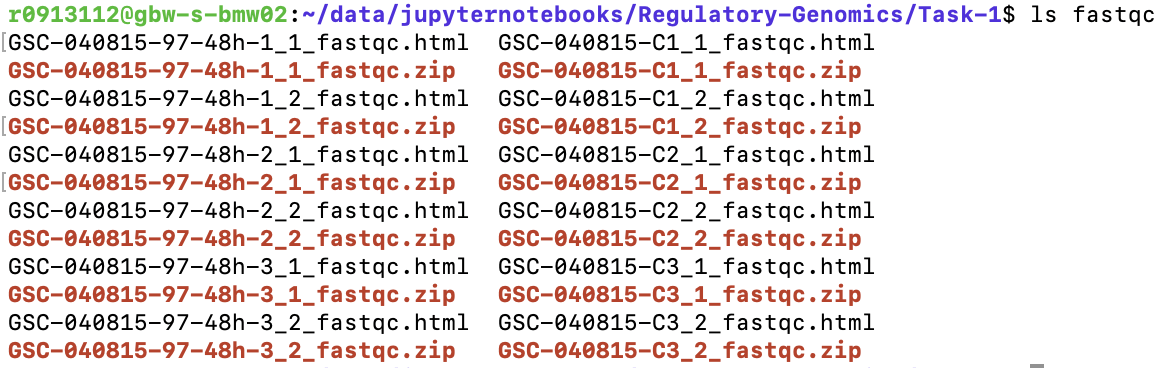

These files are then downloaded so we can take a look at them. The easiest way to download them directly into our computer is using the "scp" command in a new terminal window. The html files are opened in a web browser and the quality of each read is analyzed. 

### READ QUALITY
In the case of our sequences, all seem to be of good quality (Phred scores >30). There doesn't seem to be any adaptor contamination. However, the module issued a warning since the difference between A and T is greater than 10% in any position. 

## STAR ALIGNMENT

In [ ]:
#First, we will create a directory for the alignments
mkdir alignment

#We will align the paired-end reads for each sample with the HG38 human reference genome 
#Control 1
STAR \
--genomeDir /mnt/storage/sdewin/STAR/star_db_hg38 \
--runThreadN 2 \
--readFilesIn fastq-files/GSC-040815-C1_1.fastq fastq-files/GSC-040815-C1_2.fastq \
--outFileNamePrefix alignment/GSC-040815-C1.

#Control 2
STAR \
--genomeDir /mnt/storage/sdewin/STAR/star_db_hg38 \
--runThreadN 2 \
--readFilesIn fastq-files/GSC-040815-C2_1.fastq fastq-files/GSC-040815-C2_2.fastq \
--outFileNamePrefix alignment/GSC-040815-C2.

#Control 3
STAR \
--genomeDir /mnt/storage/sdewin/STAR/star_db_hg38 \
--runThreadN 2 \
--readFilesIn fastq-files/GSC-040815-C3_1.fastq fastq-files/GSC-040815-C3_2.fastq \
--outFileNamePrefix alignment/GSC-040815-C3.

#Treated GSCs, replicate 1
STAR \
--genomeDir /mnt/storage/sdewin/STAR/star_db_hg38 \
--runThreadN 2 \
--readFilesIn fastq-files/GSC-040815-97-48h-1_1.fastq fastq-files/GSC-040815-97-48h-1_2.fastq \
--outFileNamePrefix alignment/GSC-040815-97-48h-1.

#Treated GSCs, replicate 2
STAR \
--genomeDir /mnt/storage/sdewin/STAR/star_db_hg38 \
--runThreadN 2 \
--readFilesIn fastq-files/GSC-040815-97-48h-2_1.fastq fastq-files/GSC-040815-97-48h-2_2.fastq \
--outFileNamePrefix alignment/GSC-040815-97-48h-2.

#Treated GSCs, replicate 3
STAR \
--genomeDir /mnt/storage/sdewin/STAR/star_db_hg38 \
--runThreadN 2 \
--readFilesIn fastq-files/GSC-040815-97-48h-3_1.fastq fastq-files/GSC-040815-97-48h-3_2.fastq \
--outFileNamePrefix alignment/GSC-040815-97-48h-3.

In [10]:
#After mapping the fastq files to the reference genome, it's useful to delete them
#They are quite large (>90G) and can be recovered at any time from the SRAs 
cd /home/luna.kuleuven.be/r0913112/data/jupyternotebooks/Regulatory-Genomics/Task-1/
rm -r fastq-files

After aligning all the files, it's useful to convert the SAM format into BAM. These files also need to be indexed in order to visualize them. 
SAM is a file format that contains sequence alignment information (stands for Sequence Alignment Map). BAM files (Binary Alignment Map) contain the exact same information as SAM files, but they are in a binary format that makes them smaller and more efficient for software to use. However, they are not readable by humans and need to be processed using different formats. Finally, indexing is sort of like creating a "table of contents" for a BAM file, and results in a BAI file. These files are much smaller, and basically contains the location of reads within the file. 

In [6]:
cd /home/luna.kuleuven.be/r0913112/data/jupyternotebooks/Regulatory-Genomics/Task-1
ls alignment/

GSC-040815-97-48h-1.Aligned.out.sam   GSC-040815-C1.Aligned.out.sam
GSC-040815-97-48h-1.Log.final.out     GSC-040815-C1.Log.final.out
GSC-040815-97-48h-1.Log.out           GSC-040815-C1.Log.out
GSC-040815-97-48h-1.Log.progress.out  GSC-040815-C1.Log.progress.out
GSC-040815-97-48h-1.SJ.out.tab        GSC-040815-C1.SJ.out.tab
GSC-040815-97-48h-2.Aligned.out.sam   GSC-040815-C2.Aligned.out.sam
GSC-040815-97-48h-2.Log.final.out     GSC-040815-C2.Log.final.out
GSC-040815-97-48h-2.Log.out           GSC-040815-C2.Log.out
GSC-040815-97-48h-2.Log.progress.out  GSC-040815-C2.Log.progress.out
GSC-040815-97-48h-2.SJ.out.tab        GSC-040815-C2.SJ.out.tab
GSC-040815-97-48h-3.Aligned.out.sam   GSC-040815-C3.Aligned.out.sam
GSC-040815-97-48h-3.Log.final.out     GSC-040815-C3.Log.final.out
GSC-040815-97-48h-3.Log.out           GSC-040815-C3.Log.out
GSC-040815-97-48h-3.Log.progress.out  GSC-040815-C3.Log.progress.out
GSC-040815-97-48h-3.SJ.out.tab        GSC-040815-C3.SJ.out.tab


In [7]:
#Control 1
samtools sort alignment/GSC-040815-C1.Aligned.out.sam \
    -O BAM \
    -o alignment/GSC-040815-C1.Aligned.out.bam

samtools index alignment/GSC-040815-C1.Aligned.out.bam

#Control 2
samtools sort alignment/GSC-040815-C2.Aligned.out.sam \
    -O BAM \
    -o alignment/GSC-040815-C2.Aligned.out.bam

samtools index alignment/GSC-040815-C2.Aligned.out.bam

#Control 3
samtools sort alignment/GSC-040815-C3.Aligned.out.sam \
    -O BAM \
    -o alignment/GSC-040815-C3.Aligned.out.bam

samtools index alignment/GSC-040815-C3.Aligned.out.bam

#Treated GSCs, replicate 1
samtools sort alignment/GSC-040815-97-48h-1.Aligned.out.sam \
    -O BAM \
    -o alignment/GSC-040815-97-48h-1.Aligned.out.bam

samtools index alignment/GSC-040815-97-48h-1.Aligned.out.bam
    
#Treated GSCs, replicate 2
samtools sort alignment/GSC-040815-97-48h-2.Aligned.out.sam \
    -O BAM \
    -o alignment/GSC-040815-97-48h-2.Aligned.out.bam

samtools index alignment/GSC-040815-97-48h-2.Aligned.out.bam

#Treated GSCs, replicate 3
samtools sort alignment/GSC-040815-97-48h-3.Aligned.out.sam \
    -O BAM \
    -o alignment/GSC-040815-97-48h-3.Aligned.out.bam

samtools index alignment/GSC-040815-97-48h-3.Aligned.out.bam

[bam_sort_core] merging from 19 files and 1 in-memory blocks...
[bam_sort_core] merging from 14 files and 1 in-memory blocks...
[bam_sort_core] merging from 21 files and 1 in-memory blocks...
[bam_sort_core] merging from 27 files and 1 in-memory blocks...
[bam_sort_core] merging from 20 files and 1 in-memory blocks...
[bam_sort_core] merging from 17 files and 1 in-memory blocks...


In [8]:
#Check that all the .bam files and their indices (.bam.bai) are all in the alignment folder
ls alignment

GSC-040815-97-48h-1.Aligned.out.bam      GSC-040815-C1.Aligned.out.bam
GSC-040815-97-48h-1.Aligned.out.bam.bai  GSC-040815-C1.Aligned.out.bam.bai
GSC-040815-97-48h-1.Aligned.out.sam      GSC-040815-C1.Aligned.out.sam
GSC-040815-97-48h-1.Log.final.out        GSC-040815-C1.Log.final.out
GSC-040815-97-48h-1.Log.out              GSC-040815-C1.Log.out
GSC-040815-97-48h-1.Log.progress.out     GSC-040815-C1.Log.progress.out
GSC-040815-97-48h-1.SJ.out.tab           GSC-040815-C1.SJ.out.tab
GSC-040815-97-48h-2.Aligned.out.bam      GSC-040815-C2.Aligned.out.bam
GSC-040815-97-48h-2.Aligned.out.bam.bai  GSC-040815-C2.Aligned.out.bam.bai
GSC-040815-97-48h-2.Aligned.out.sam      GSC-040815-C2.Aligned.out.sam
GSC-040815-97-48h-2.Log.final.out        GSC-040815-C2.Log.final.out
GSC-040815-97-48h-2.Log.out              GSC-040815-C2.Log.out
GSC-040815-97-48h-2.Log.progress.out     GSC-040815-C2.Log.progress.out
GSC-040815-97-48h-2.SJ.out.tab           GSC-040815-C2.SJ.out.tab
GSC-040815-97-48h-3.Aligne

In [ ]:
#After making sure that the .bam and .bam.bai files are all there, we can go ahead 
#It's important to delete all the .sam files, since they are very big and take up a lot of unnecessary space
rm alignment/*.sam

When all the BAM files have been created and indexed, we can view them and check out the statistics (see how many reads mapped to each chromosome). We can tell that all files were created correctly because we have both .bam and .bam.bai files:
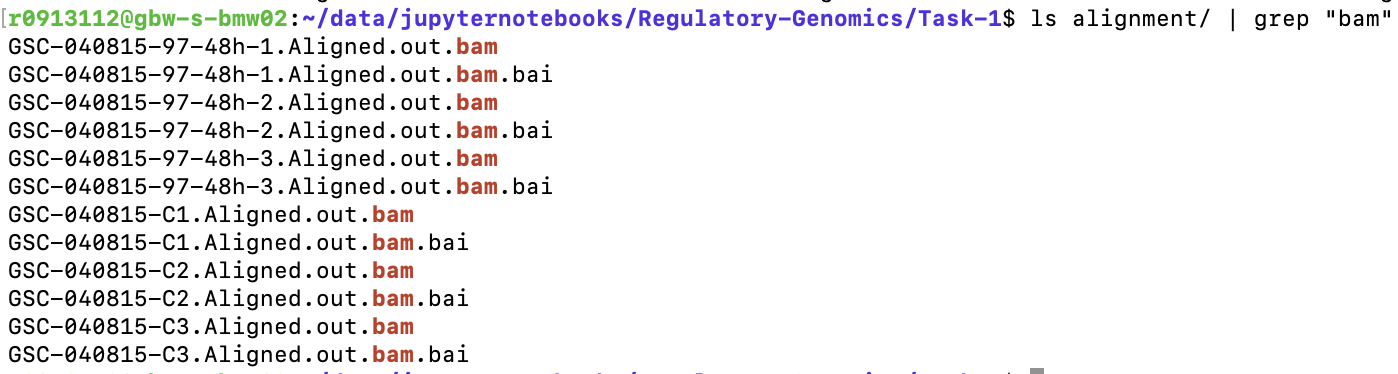

In [ ]:
#We used the samtools program again to view the statistics of each file. 
#Control 1
samtools view alignment/GSC-040815-C1.Aligned.out.bam | head -n 1
samtools idxstats alignment/GSC-040815-C1.Aligned.out.bam 

#Control 2
samtools view alignment/GSC-040815-C2.Aligned.out.bam | head -n 1
samtools idxstats alignment/GSC-040815-C2.Aligned.out.bam 

#Control 3
samtools view alignment/GSC-040815-C3.Aligned.out.bam | head -n 1
samtools idxstats alignment/GSC-040815-C3.Aligned.out.bam 

#Treated GSCs, replicate 1
samtools view alignment/GSC-040815-97-48h-1.Aligned.out.bam | head -n 1
samtools idxstats alignment/GSC-040815-97-48h-1.Aligned.out.bam 

#Treated GSCs, replicate 2
samtools view alignment/GSC-040815-97-48h-2.Aligned.out.bam | head -n 1
samtools idxstats alignment/GSC-040815-97-48h-2.Aligned.out.bam 

#Treated GSCs, replicate 3
samtools view alignment/GSC-040815-97-48h-3.Aligned.out.bam | head -n 1
samtools idxstats alignment/GSC-040815-97-48h-3.Aligned.out.bam 

Our analysis shows that all files have mapped well to each chromosome. For all "bam" files, there are 0 unmapped reads. 
For example, the file for "Control 1" shows the following results:
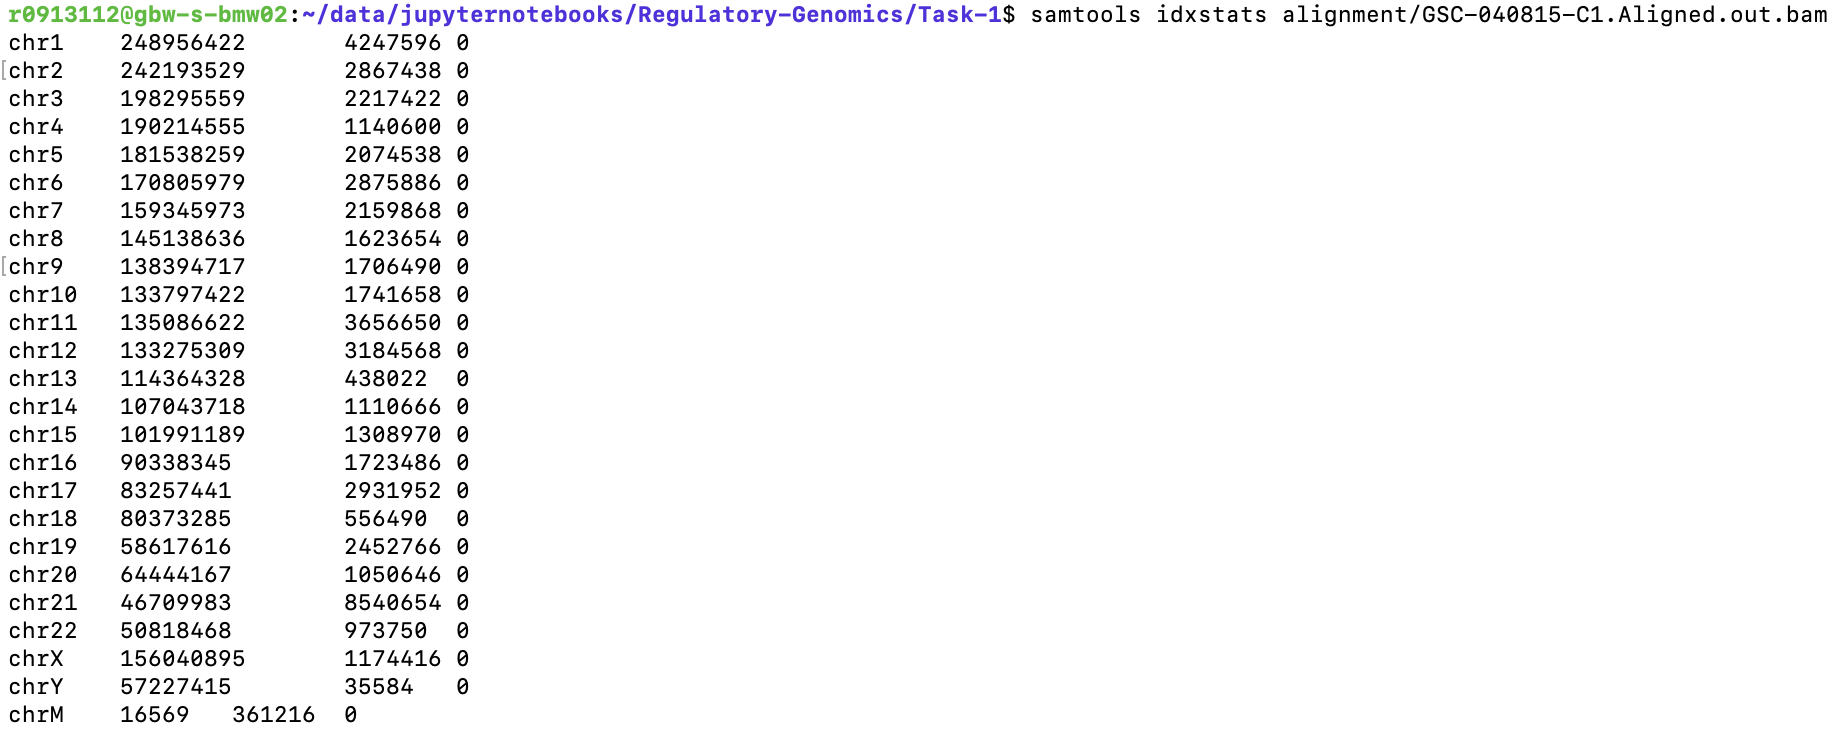
We can move on to counting. 

Moreover, the bam files, as well as the indexed files (.bam.bai) of the control samples are viewed in IGV.
IGV is "a high-performance viewer that efficiently handles large heterogeneous data sets, while providing a smooth and intuitive user experience at all levels of genome resolution" (Thorvaldsdóttir et al 2013).

In it, we can see the mapping results for our three controls. A gene known to be involved in GBM is CDK2AP1 (Cyclin Dependent Kinase 2 Associated Protein 1), which has functions related to tumorigenesis, tumor progression, and cell cycle regulation.

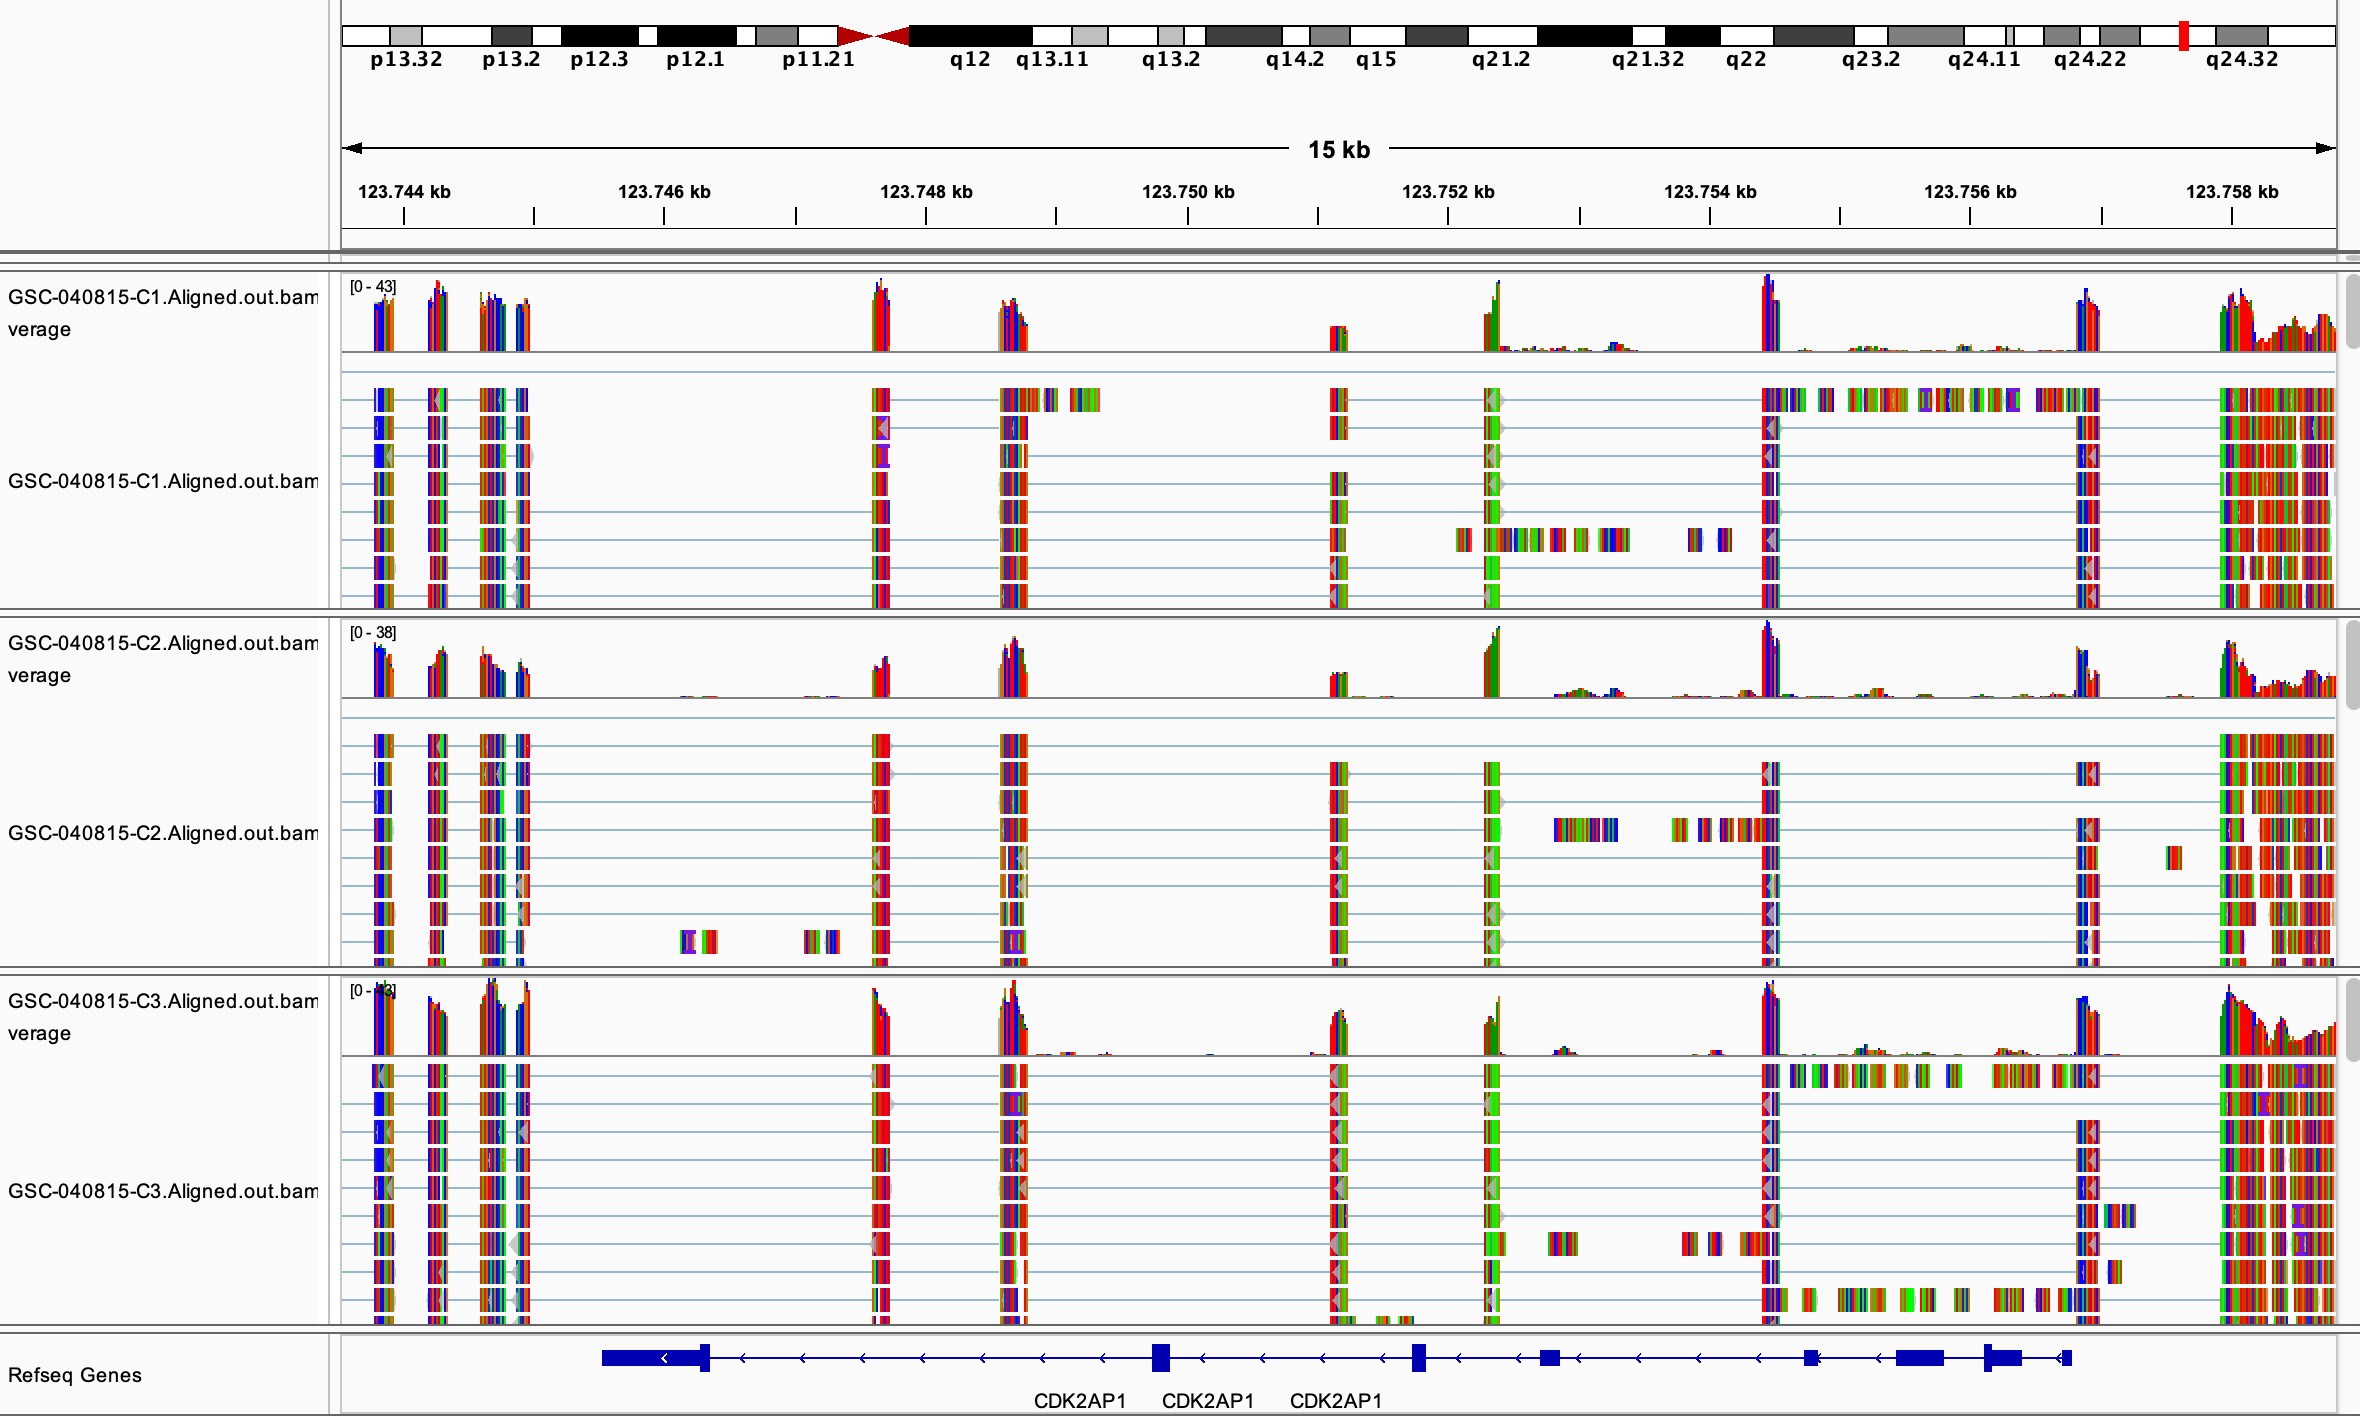

In [ ]:
ln -sf /mnt/storage/sdewin/STAR/star_db_hg38/gencode.v26.primary_assembly.annotation.gtf .

#The program featureCounts allows us to count how many reads overlap each gene for each sample. 
featureCounts \
> -Q 10 \
> -g gene_name \
> -a gencode.v26.primary_assembly.annotation.gtf \
> -o counts/GSCs.counts \
> alignment/*.bam

#The entire procedure took a little under 5 minutes. 

We can then inspect the counts file, which is the output that the "featureCounts" command generates. This file contains a lot of information, so we will format it in order to preform the differential expression analyses. 

In [ ]:
cat counts/GSCs.counts \
    | grep -v "#" \
    | cut -f 1,7,8,9,10 \
    | sed "s/alignment\///g" \
    | sed "s/.Aligned.sortedByCoord.out.bam//g" \
    > counts/GSCs.counts.formatted

This formatted file will allow us to inspect specific genes and see in which samples they are more expressed. For example, the gene "CDKN1A" seems to be expressed significantly more in the treated cells that in the control cells:
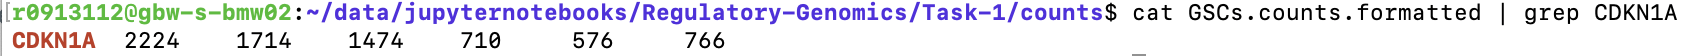
However, we cannot say with certainty that this difference is significant. In the next part of this exercise, we will see how to preform the differential expression analyses, using R and DeSeq2. 